Text(0.5, 1.0, 'Unmasked fired ammunition')

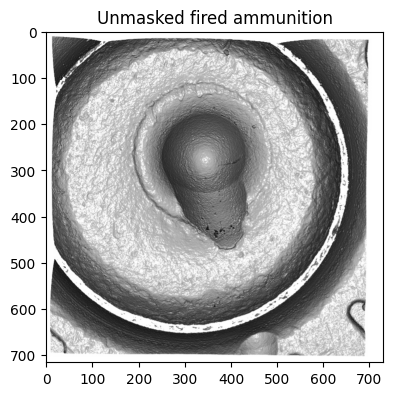

In [3]:
#Import libraries to plot the fired ammunition and masking
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


#Save the preprocessed image and load or plot it using the file path
image_path = 'Picture1.jpg'

#Read the image into a variable that can then be plotted against a 2D graph
original_image = cv2.imread(image_path)

# Plot the image
plt.figure(figsize=(20, 15))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Unmasked fired ammunition')

Text(0.5, 1.0, 'Edge Detection')

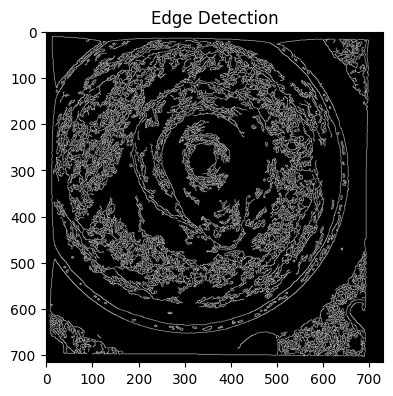

In [9]:
# Preprocess the image using GaussianBlur to reduce noise and improve detail
img_blur = cv2.GaussianBlur(original_image, (5, 5), 0)

# Apply Canny edge detection to tune out the various edges within the image
edge_detect = cv2.Canny(img_blur, 10, 200)

# Set the graph size
plt.figure(figsize=(20, 15))

# Display the edge detection result
plt.subplot(1, 4, 1)
plt.imshow(edge_detect, cmap='gray')
plt.title('Edge Detection')

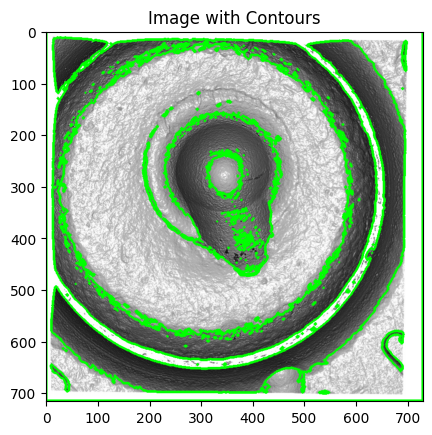

In [29]:
# Convert the blurred image to grayscale to detect contors
gray_image = cv2.cvtColor(img_blur, cv2.COLOR_BGR2GRAY)

# Thresholding to observe various pixel intensities for contouring
ret, thresh = cv2.threshold(gray_image, 127, 255, 0)

# Now that the image has been made into binary thresholds, display the pixel intensities, we find contours by applying the findContours function
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a copy of the original image
image_with_contours = original_image.copy()
ct = cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 3)

# Display the image with contours
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.title('Image with Contours')
plt.show()


Text(0.5, 1.0, 'Masked Image')

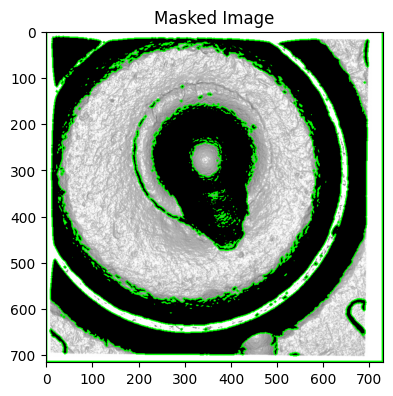

In [32]:
# Create a mask using the original images dimensions
mask = np.zeros_like(original_image)

# Draw contours on the mask
cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

# Apply the mask to the original image using NumPy array operations
masked_image = original_image.copy()
masked_image[mask == 0] = 0

plt.figure(figsize=(20, 15))

# Display the masked image
plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.title('Masked Image')